# Черновой вариант итогового проекта для курса "Python для Data Science"

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_columns = 100

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Описание датасета

1. Id - идентификационный номер квартиры
2. DistrictId - идентификационный номер района
3. Rooms - количество комнат
4. Square - площадь
5. LifeSquare - жилая площадь
6. KitchenSquare - площадь кухни
7. Floor - этаж
8. HouseFloor - количество этажей в доме
9. HouseYear - год постройки дома
10. Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
11. Social_1, Social_2, Social_3 - социальные показатели местности
12. Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
13. Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
14. Price - цена квартиры

### Загружаю датасеты

In [130]:
TRAIN_DATASET_PATH = 'datasets/train.csv'
TEST_DATASET_PATH = 'datasets/test.csv'
PREPARED_TRAIN_DATASET_PATH = 'datasets/train_prepared.csv'
PREPARED_TEST_DATASET_PATH = 'datasets/test_prepared.csv'
SCALED_TRAIN_DATASET_PATH = 'datasets/train_scaled.csv'
X_TRAIN = 'datasets/X_train.csv'
X_VALID = 'datasets/X_valid.csv'
Y_TRAIN = 'datasets/y_train.csv'
Y_VALID = 'datasets/y_valid.csv'
SCALER_FILE_PATH = 'scaler.pkl'
MODEL_PATH = 'model.pkl'

##### Train dataset

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
df_train.shape

(10000, 20)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [6]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [7]:
df_train.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

##### Test dataset

In [8]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [9]:
df_test.shape

(5000, 19)

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [11]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [12]:
df_test.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

### Обработка пропусков

##### LifeSquare

In [13]:
lsquare_median_train = round(df_train["LifeSquare"].median(), 6)
lsquare_median_test = round(df_test["LifeSquare"].median(), 6)
print(f'Медиана LifeSquare обучающего датасета:\t {lsquare_median_train}')
print(f'Медиана LifeSquare тестового датасета:\t {lsquare_median_test}')

Медиана LifeSquare обучающего датасета:	 32.78126
Медиана LifeSquare тестового датасета:	 32.925087


Пропуски заполняю медианным значением LifeSquare, если это значение меньше значения Square

In [14]:
df_train.loc[df_train['LifeSquare'].isnull() & (df_train['Square'] > lsquare_median_train), 'LifeSquare'] = lsquare_median_train

In [15]:
df_test.loc[df_test['LifeSquare'].isnull() & (df_train['Square'] > lsquare_median_test), 'LifeSquare'] = lsquare_median_test

Оставшиеся пропуски заполняю разницей `Square` и `разницы медианных значений Square и LifeSquare`, если это значение меньше значения LifeSquare

In [16]:
sub_square_train = round(df_train['Square'].median() - df_train['LifeSquare'].median(), 6)
print(f'Разница медиан Square и LifeSquare обучающего датасета:\t {sub_square_train}')

Разница медиан Square и LifeSquare обучающего датасета:	 19.73205


In [17]:
df_train.loc[df_train['LifeSquare'].isnull() & (df_train['Square'] > sub_square_train), 'LifeSquare'] = df_train['Square'] - lsquare_median_train

In [18]:
sub_square_test = round(df_test['Square'].median() - df_test['LifeSquare'].median(), 6)
print(f'Разница медиан Square и LifeSquare тестового датасета:\t {sub_square_test}')

Разница медиан Square и LifeSquare тестового датасета:	 19.996253


In [19]:
df_test.loc[df_test['LifeSquare'].isnull() & (df_test['Square'] > sub_square_test), 'LifeSquare'] = df_test['Square'] - lsquare_median_test

In [20]:
df_train.loc[df_train['LifeSquare'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6945,12927,62,2.0,17.414181,NaN,1.0,4,20.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,180750.471749


In [21]:
df_test.loc[df_test['LifeSquare'].isnull(), 'LifeSquare'].sum()

0.0

Последнее пустое значение приравниваю к Square

In [22]:
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['Square']

In [23]:
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'].sum()

0.0

##### Healthcare_1

In [24]:
hc1_median_train = round(df_train["Healthcare_1"].median(), 3)
hc1_median_test = round(df_test["Healthcare_1"].median(), 3)
print(f'Медиана Healthcare_1 обучающего датасета:\t {hc1_median_train}')
print(f'Медиана Healthcare_1 тестового датасета:\t {hc1_median_test}')

Медиана Healthcare_1 обучающего датасета:	 900.0
Медиана Healthcare_1 тестового датасета:	 900.0


In [25]:
df_train.loc[df_train['Healthcare_1'].isnull(), 'Healthcare_1'] = hc1_median_train

In [26]:
df_test.loc[df_test['Healthcare_1'].isnull(), 'Healthcare_1'] = hc1_median_test

In [27]:
df_train.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [28]:
df_test.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64

### Обработка выбросов обучающего датасета

In [29]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.130546,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.647075,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,-6.228072,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.165748,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


##### Rooms

In [30]:
df_train.loc[(df_train['Rooms'] > 10) | (df_train['Rooms'] == 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,900.0,0,0,B,268394.744389
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,900.0,0,1,B,78364.616704
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,900.0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,32.781260,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,32.781260,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,32.781260,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,900.0,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,219281.918007


In [31]:
df_train.loc[(df_train['Rooms'] > 10) | (df_train['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].median()

#### LifeSquare

In [32]:
df_train.loc[(df_train['LifeSquare'] > 300) | (df_train['LifeSquare'] <= 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
257,1334,23,1.0,29.401008,-3.380252,1.0,4,17.0,2019,0.034656,B,B,0,168,0,900.0,0,0,B,71690.969474
381,5612,23,1.0,29.567101,-3.214159,1.0,6,4.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,74012.218991
501,15923,27,1.0,26.553188,-6.228072,0.0,25,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,114256.236153
769,5234,30,1.0,29.947691,-2.833569,1.0,11,22.0,2018,0.000078,B,B,22,6398,141,1046.0,3,23,B,99110.577389
900,8940,34,1.0,26.811587,-5.969673,0.0,18,0.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B,175399.643453
1176,13580,27,1.0,31.745920,-1.035340,1.0,19,25.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A,105571.677833
1184,3902,23,1.0,27.442238,-5.339022,1.0,4,4.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,65547.071846
1212,9456,27,1.0,30.493932,-2.287328,1.0,5,22.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,77007.287462
1363,7155,33,1.0,31.279925,-1.501335,0.0,4,8.0,1977,0.236108,B,B,16,3893,27,900.0,3,10,B,152656.513571
2223,9186,33,1.0,32.481427,-0.299833,0.0,10,8.0,1977,0.236108,B,B,16,3893,27,900.0,3,10,B,170842.817332


In [33]:
# Данные значения заполняю разностью Square и sub_square_train
df_train.loc[(df_train['LifeSquare'] > 300) | (df_train['LifeSquare'] <= 0), 'LifeSquare'] = df_train['Square'] - sub_square_train

##### KitchenSquare

In [34]:
df_train.loc[(df_train['KitchenSquare'] > 150) | (df_train['KitchenSquare'] == 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,32.781260,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
23,6641,54,3.0,118.907612,32.781260,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
39,9371,23,2.0,60.503248,32.781260,0.0,16,0.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,229778.057902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,8438,1,2.0,66.736039,32.781260,0.0,16,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,199237.847364
9953,5365,1,2.0,61.049491,32.781260,0.0,11,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,190085.168584
9960,9307,1,2.0,57.376642,32.781260,0.0,8,25.0,2016,0.007122,B,B,1,264,0,900.0,0,1,B,104450.496477
9965,6612,27,2.0,59.460685,32.781260,0.0,15,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,135784.320930


In [35]:
df_train.loc[(df_train['KitchenSquare'] > 150) | (df_train['KitchenSquare'] == 0), 'KitchenSquare'] = df_train['KitchenSquare'].median()

##### HouseYear

In [36]:
df_train.loc[df_train['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [37]:
df_train.loc[df_train['HouseYear'] == 20052011.0, 'HouseYear'] = 2005

In [38]:
df_train.loc[df_train['HouseYear'] == 4968.0, 'HouseYear'] = 1968

##### HouseFloor

In [39]:
df_train.loc[df_train['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,32.781260,6.0,14,0.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
23,6641,54,3.0,118.907612,32.781260,6.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,6.0,17,0.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A,337299.867936
39,9371,23,2.0,60.503248,32.781260,6.0,16,0.0,1977,0.034656,B,B,0,168,0,900.0,0,0,B,229778.057902
44,10521,38,3.0,104.211396,106.340403,6.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,12302,30,1.0,46.072913,48.307844,6.0,4,0.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,161403.094034
9769,9384,59,3.0,98.607328,32.781260,6.0,14,0.0,1977,0.019509,B,B,37,7687,11,176.0,5,5,B,492700.257473
9878,11441,62,2.0,71.985335,72.453232,6.0,5,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,158841.624543
9908,3171,62,1.0,35.873961,32.781260,6.0,25,0.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,134379.130962


In [40]:
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()

In [41]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890400,56.315775,35.394179,6.294300,8.526700,12.95910,1984.865700,0.118858,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.820156,21.058732,17.521276,4.918303,5.241148,6.44346,18.411517,0.119025,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.000000,1.136859,0.370619,1.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.165748,4.000000,4.000000,9.00000,1974.000000,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.00000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.00000,2001.000000,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,10.000000,641.065193,621.333143,123.000000,42.000000,117.00000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Обработка выбросов обучающего датасета

In [42]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,35.433700,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,16.000098,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,-2.042510,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.441819,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.908732,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


##### Rooms

In [43]:
df_test.loc[(df_test['Rooms'] > 10) | (df_test['Rooms'] == 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [44]:
df_test.loc[(df_test['Rooms'] > 10) | (df_test['Rooms'] == 0), 'Rooms'] = df_test['Rooms'].median()

#### LifeSquare

In [45]:
df_test.loc[(df_test['LifeSquare'] > 300) | (df_test['LifeSquare'] <= 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,900.0,0,0,B
1930,6941,27,1.0,30.882577,-2.042510,0.0,6,19.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B


In [46]:
# Данные значения заполняю разностью Square и sub_square_test
df_test.loc[(df_test['LifeSquare'] > 300) | (df_test['LifeSquare'] <= 0), 'LifeSquare'] = df_test['Square'] - sub_square_test

##### KitchenSquare

In [47]:
df_test.loc[(df_test['KitchenSquare'] > 150) | (df_test['KitchenSquare'] == 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
22,12694,27,3.0,83.670032,46.358356,0.0,8,0.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A
24,8968,27,2.0,69.849239,32.925087,0.0,3,0.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B
30,2982,6,2.0,63.460684,32.925087,0.0,13,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
32,2449,1,1.0,66.426585,32.925087,0.0,14,0.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
43,11513,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B
4973,1804,27,1.0,38.916778,32.925087,0.0,11,17.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B
4974,5296,52,1.0,44.442218,44.634608,0.0,5,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B
4976,4723,95,1.0,45.542940,32.925087,0.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B


In [48]:
df_test.loc[(df_test['KitchenSquare'] > 150) | (df_test['KitchenSquare'] == 0), 'KitchenSquare'] = df_test['KitchenSquare'].median()

##### HouseFloor

In [49]:
df_test.loc[df_test['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
22,12694,27,3.0,83.670032,46.358356,6.0,8,0.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A
24,8968,27,2.0,69.849239,32.925087,6.0,3,0.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B
30,2982,6,2.0,63.460684,32.925087,6.0,13,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
32,2449,1,1.0,66.426585,32.925087,6.0,14,0.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
46,12309,45,1.0,42.899569,32.925087,6.0,25,0.0,1977,0.195781,B,B,23,5212,6,900.0,3,2,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,10262,27,2.0,69.196440,32.925087,6.0,10,0.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B
4887,12116,88,3.0,89.549559,32.925087,6.0,20,0.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B
4892,16357,58,1.0,49.205978,32.925087,6.0,4,0.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
4976,4723,95,1.0,45.542940,32.925087,6.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B


In [50]:
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = df_test['HouseFloor'].median()

In [51]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.90780,56.449500,35.381415,6.25600,8.632000,12.915400,1984.392600,0.119874,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800
std,4832.674037,44.179466,0.81008,19.092787,15.540920,4.59468,5.483228,6.468617,18.573149,0.120070,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365
min,1.000000,0.000000,1.00000,1.378543,0.333490,1.00000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.00000,41.906231,25.441819,5.00000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.00000,52.921340,32.925087,6.00000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.00000,66.285129,41.896801,9.00000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000
max,16795.000000,212.000000,6.00000,223.453689,169.901701,112.00000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


### Обрабатываю object-признаки в обучающем датасете

In [52]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [53]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [54]:
df_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [55]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [56]:
obj_columns = ['Ecology_2', 'Ecology_3', 'Shops_2']

In [57]:
train_dummies = pd.get_dummies(df_train[obj_columns])
train_dummies

,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0,1,0,1,0,1
1,0,1,0,1,0,1
2,0,1,0,1,0,1
3,0,1,0,1,0,1
4,0,1,0,1,0,1
...,...,...,...,...,...,...
9995,0,1,0,1,0,1
9996,0,1,0,1,1,0
9997,0,1,0,1,1,0
9998,0,1,1,0,0,1


In [58]:
df_train = pd.concat([df_train, train_dummies], axis=1)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,...,1,3,B,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,0,1,0,1,0,1


### Обрабатываю object-признаки в тестовом датасете

In [59]:
df_test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [60]:
df_test['Ecology_2'].value_counts()

B    4952
A      48
Name: Ecology_2, dtype: int64

In [61]:
df_test['Ecology_3'].value_counts()

B    4851
A     149
Name: Ecology_3, dtype: int64

In [62]:
df_test['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [68]:
obj_columns = ['Ecology_2', 'Ecology_3', 'Shops_2']

In [69]:
train_dummies = pd.get_dummies(df_train[obj_columns])
train_dummies

,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,0,1,0,1,0,1
1,0,1,0,1,0,1
2,0,1,0,1,0,1
3,0,1,0,1,0,1
4,0,1,0,1,0,1
...,...,...,...,...,...,...
9995,0,1,0,1,0,1
9996,0,1,0,1,1,0
9997,0,1,0,1,1,0
9998,0,1,1,0,0,1


In [70]:
df_train = pd.concat([df_train, train_dummies], axis=1)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,1,0,1,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,0,1,0,1,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,...,0,1,0,1,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,1,0,1,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,0,1,0,1,0,1,0,1,0,1


### Сохраняю подготовленные датасеты

In [71]:
df_train.to_csv(PREPARED_TRAIN_DATASET_PATH, index=False, encoding='utf-8')

In [72]:
df_test.to_csv(PREPARED_TEST_DATASET_PATH, index=False, encoding='utf-8')

In [45]:
df_train = pd.read_csv(PREPARED_TRAIN_DATASET_PATH)

In [46]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Ecology_2_A.1,Ecology_2_B.1,Ecology_3_A.1,Ecology_3_B.1,Shops_2_A.1,Shops_2_B.1
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,900.0,0,11,B,184966.930730,0,1,0,1,0,1,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063,0,1,0,1,0,1,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524,0,1,0,1,0,1,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217,0,1,0,1,0,1,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644,0,1,0,1,0,1,0,1,0,1,0,1


### Визуализация обучающего датасета

In [80]:
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "darkgrey",
    "family": "arial",
}

label_font = {
    "fontsize": 10,
    "family": "arial",
}

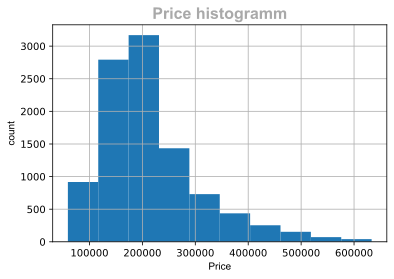

In [6]:
plt.figure(figsize=(6,4))
df_train['Price'].hist()  

plt.title('Price histogramm', fontdict=title_font)
plt.ylabel('count', fontdict=label_font)
plt.xlabel('Price', fontdict=label_font)

plt.show()

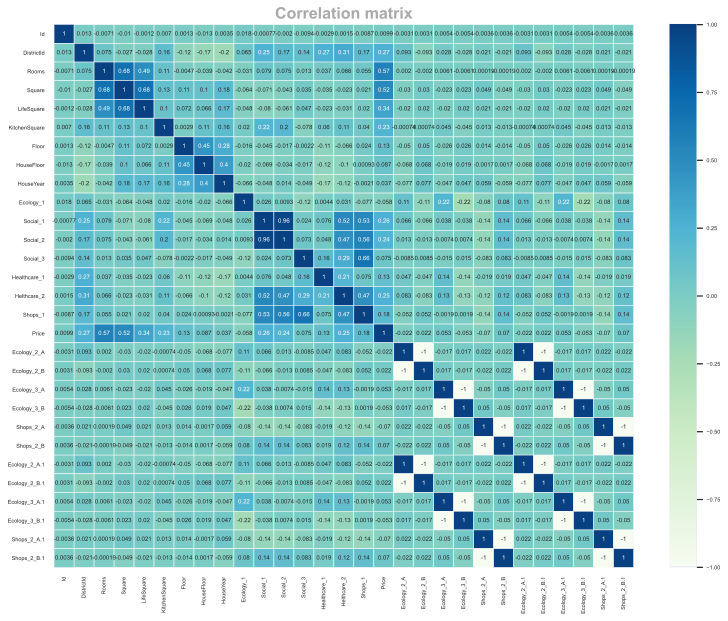

In [7]:
plt.figure(figsize = (13,10))

sns.set(font_scale=0.5)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix', fontdict=title_font)

plt.show()

### Стандартизирую признаки

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
Ecology_2_A        int64
Ecology_2_B        int64
Ecology_3_A        int64
Ecology_3_B        int64
Shops_2_A          int64
Shops_2_B          int64
Ecology_2_A.1      int64
Ecology_2_B.1      int64
Ecology_3_A.1      int64
Ecology_3_B.1      int64
Shops_2_A.1        int64
Shops_2_B.1        int64
dtype: object

In [50]:
columns_for_stand = df_train.columns[:19]
columns_for_stand = df_train[columns_for_stand].select_dtypes(include=['float64', 'int64']).columns.tolist()

In [51]:
columns_for_stand = df_train[columns_for_stand].select_dtypes(include=['float64', 'int64']).columns.tolist()
columns_for_stand

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

In [52]:
scaler = StandardScaler()
standard_features = scaler.fit_transform(df_train[columns_for_stand])

In [53]:
df_train[columns_for_stand] = pd.DataFrame(standard_features, columns=columns_for_stand)

In [54]:
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Ecology_2_A.1,Ecology_2_B.1,Ecology_3_A.1,Ecology_3_B.1,Shops_2_A.1,Shops_2_B.1
0,1.163789,-0.353348,0.133640,-0.395780,-0.339686,-0.059841,-0.291306,-0.614468,-0.861770,-0.250529,B,B,0.474169,0.654880,-0.127533,-0.169240,-0.883480,1.408356,B,184966.930730,0,1,0,1,0,1,0,1,0,1,0,1
1,1.372690,-0.215687,1.352982,0.444867,0.265711,0.346824,-0.291306,-0.614468,-0.372921,-0.998053,B,B,1.215681,1.237169,-0.295384,-1.053217,-0.213923,2.448700,B,300009.450063,0,1,0,1,0,1,0,1,0,1,0,1
2,-0.744716,0.059635,0.133640,-0.539842,-0.353677,-0.059841,-0.100498,-0.148856,-0.916087,-0.581588,B,B,0.531208,0.600720,-0.337347,-1.067950,-0.213923,-0.256195,B,220925.908524,0,1,0,1,0,1,0,1,0,1,0,1
3,-0.529847,0.174352,0.133640,-0.140699,0.989551,0.550156,-0.100498,0.627163,-0.427238,2.680470,B,B,-0.096225,0.095553,-0.211458,0.077202,-0.883480,0.159943,B,175616.227217,0,1,0,1,0,1,0,1,0,1,0,1
4,0.493868,1.115034,-1.085702,-0.791473,-0.663113,0.143492,0.471924,-0.148856,-0.481554,-0.894969,B,B,0.588247,0.105786,-0.295384,1.408526,0.455633,-0.048126,B,150226.531644,0,1,0,1,0,1,0,1,0,1,0,1


In [55]:
df_train.std()

Id                   1.000050
DistrictId           1.000050
Rooms                1.000050
Square               1.000050
LifeSquare           1.000050
KitchenSquare        1.000050
Floor                1.000050
HouseFloor           1.000050
HouseYear            1.000050
Ecology_1            1.000050
Social_1             1.000050
Social_2             1.000050
Social_3             1.000050
Healthcare_1         1.000050
Helthcare_2          1.000050
Shops_1              1.000050
Price            92872.293865
Ecology_2_A          0.098015
Ecology_2_B          0.098015
Ecology_3_A          0.163543
Ecology_3_B          0.163543
Shops_2_A            0.275139
Shops_2_B            0.275139
Ecology_2_A.1        0.098015
Ecology_2_B.1        0.098015
Ecology_3_A.1        0.163543
Ecology_3_B.1        0.163543
Shops_2_A.1          0.275139
Shops_2_B.1          0.275139
dtype: float64

##### Удаляю object-признаки

In [56]:
feature_names = df_train.columns
feature_names = df_train[feature_names].select_dtypes(include=['float64', 'int64']).columns.tolist()
feature_names

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B',
 'Ecology_2_A.1',
 'Ecology_2_B.1',
 'Ecology_3_A.1',
 'Ecology_3_B.1',
 'Shops_2_A.1',
 'Shops_2_B.1']

In [57]:
df = df_train[feature_names]
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Ecology_2_A.1,Ecology_2_B.1,Ecology_3_A.1,Ecology_3_B.1,Shops_2_A.1,Shops_2_B.1
0,1.163789,-0.353348,0.133640,-0.395780,-0.339686,-0.059841,-0.291306,-0.614468,-0.861770,-0.250529,0.474169,0.654880,-0.127533,-0.169240,-0.883480,1.408356,184966.930730,0,1,0,1,0,1,0,1,0,1,0,1
1,1.372690,-0.215687,1.352982,0.444867,0.265711,0.346824,-0.291306,-0.614468,-0.372921,-0.998053,1.215681,1.237169,-0.295384,-1.053217,-0.213923,2.448700,300009.450063,0,1,0,1,0,1,0,1,0,1,0,1
2,-0.744716,0.059635,0.133640,-0.539842,-0.353677,-0.059841,-0.100498,-0.148856,-0.916087,-0.581588,0.531208,0.600720,-0.337347,-1.067950,-0.213923,-0.256195,220925.908524,0,1,0,1,0,1,0,1,0,1,0,1
3,-0.529847,0.174352,0.133640,-0.140699,0.989551,0.550156,-0.100498,0.627163,-0.427238,2.680470,-0.096225,0.095553,-0.211458,0.077202,-0.883480,0.159943,175616.227217,0,1,0,1,0,1,0,1,0,1,0,1
4,0.493868,1.115034,-1.085702,-0.791473,-0.663113,0.143492,0.471924,-0.148856,-0.481554,-0.894969,0.588247,0.105786,-0.295384,1.408526,0.455633,-0.048126,150226.531644,0,1,0,1,0,1,0,1,0,1,0,1


In [58]:
# сохраняю стандартизированный датасет
df.to_csv(SCALED_TRAIN_DATASET_PATH, index=False, encoding='utf-8')

### Разбиваю обучающи датасет на train и valid

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df.loc[:, df.columns != 'Price']
y = df.loc[:, df.columns == 'Price']

In [102]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=27)

##### Сохраняю датасеты в файлы

In [103]:
X_train.to_csv(X_TRAIN, index=False, encoding='utf-8')
X_valid.to_csv(X_VALID, index=False, encoding='utf-8')
y_train.to_csv(Y_TRAIN, index=False, encoding='utf-8')
y_valid.to_csv(Y_VALID, index=False, encoding='utf-8')

In [25]:
X_train = pd.read_csv(X_TRAIN)
X_valid = pd.read_csv(X_VALID)
y_train = pd.read_csv(Y_TRAIN)
y_valid = pd.read_csv(Y_VALID)

In [104]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(7500, 28)
(7500, 1)
(2500, 28)
(2500, 1)


In [105]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import log_loss
from math import sqrt

In [106]:
def r2_score(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n")
    
    plt.figure(figsize=(10,10))
    
    plt.scatter(y_valid_preds, y_valid)
   
    plt.title('True vs Predicted values', fontdict=title_font)
    plt.xlabel('Predicted values', fontdict=label_font)
    plt.ylabel('True values', fontdict=label_font)
        
    plt.show()
    return None

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### LinearRegression

In [108]:
lr_model = LinearRegression()

In [109]:
lr_model.fit(X_train, y_train)

LinearRegression()

R2:	0.497



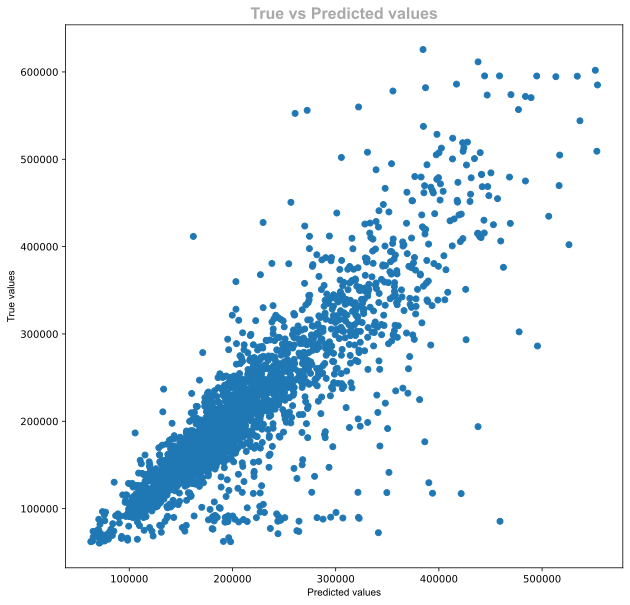

In [110]:
y_train_preds = lr_model.predict(X_train)
r2_score(y_train, y_train_preds)

R2:	0.514



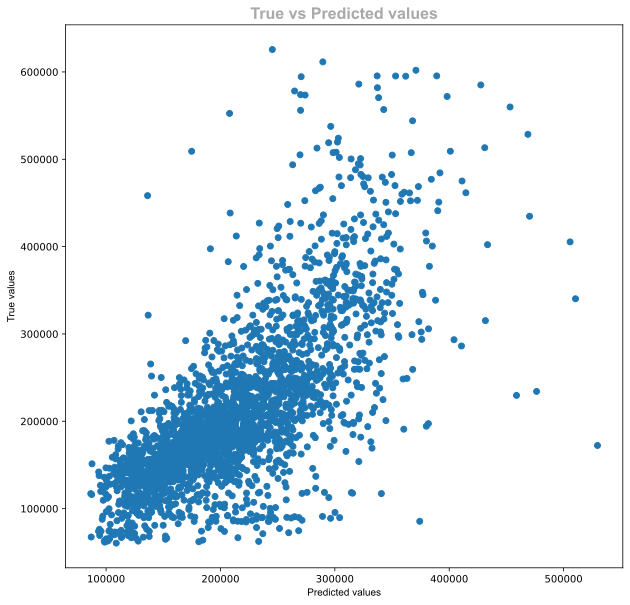

In [111]:
y_valid_preds = lr_model.predict(X_valid)
r2_score(y_valid, y_valid_preds)

### Random Forrest

In [112]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

R2:	0.961



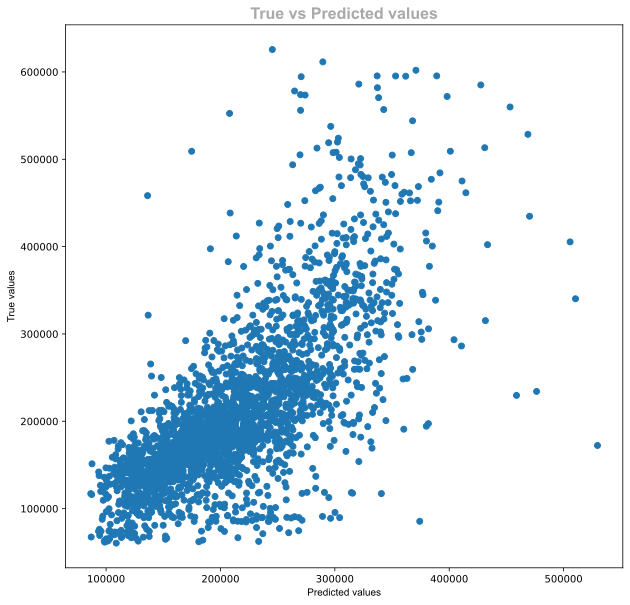

In [113]:
y_train_preds = rf_model.predict(X_train)
r2_score(y_train, y_train_preds)

R2:	0.719



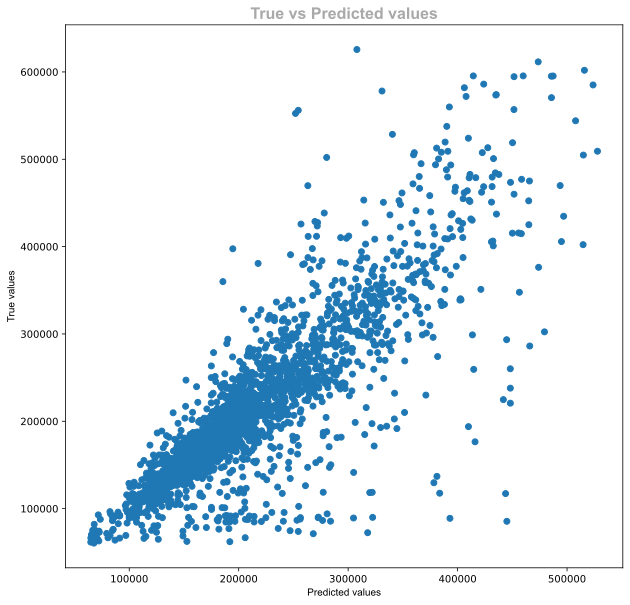

In [114]:
y_valid_preds = rf_model.predict(X_valid)
r2_score(y_valid, y_valid_preds)

### Gradient Boosting

In [115]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

R2:	0.765



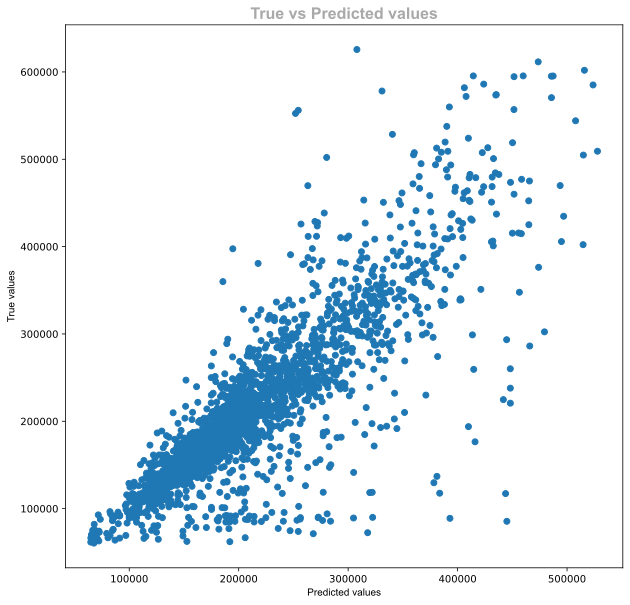

In [116]:
y_train_preds = gb_model.predict(X_train)
r2_score(y_train, y_train_preds)

R2:	0.727



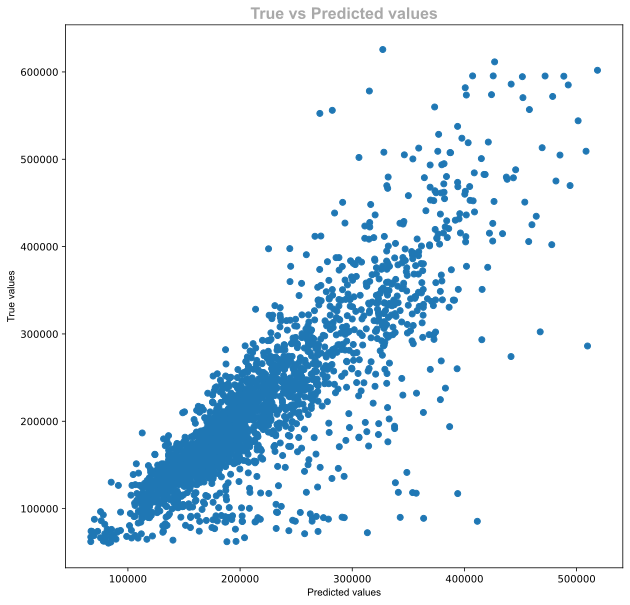

In [117]:
y_valid_preds = gb_model.predict(X_valid)
r2_score(y_valid, y_valid_preds)

### Подбор параметров

In [118]:
gb_model = GradientBoostingRegressor(random_state=27)
gb_model

GradientBoostingRegressor(random_state=27)

In [123]:
params = {'n_estimators':[50, 100, 200, 400], 
          'max_depth':[3, 5, 7, 10]}

gs = GridSearchCV(gb_model, params, scoring='r2', n_jobs=-1)
gs.fit(X, y)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=27), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2')

In [124]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [125]:
gs.best_score_

0.7413633892309172

##### Обучение финальной модели

In [126]:
final_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=27)
final_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=27)

R2:	0.903



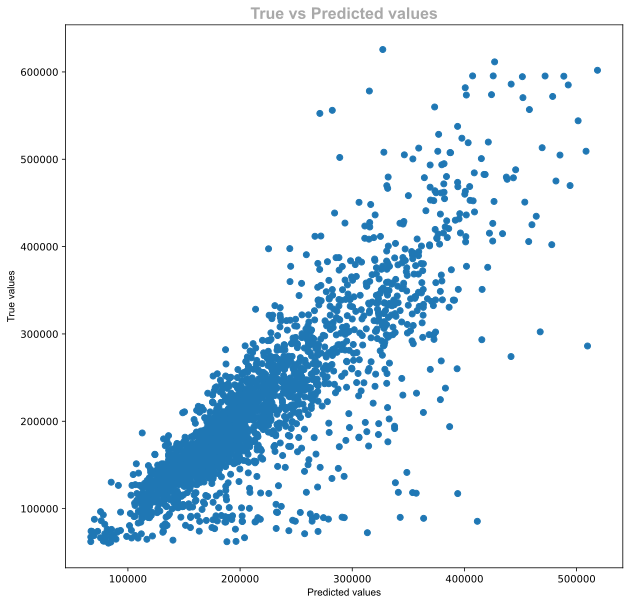

In [100]:
y_train_preds = final_model.predict(X_train)
r2_score(y_train, y_train_preds)

R2:	0.745



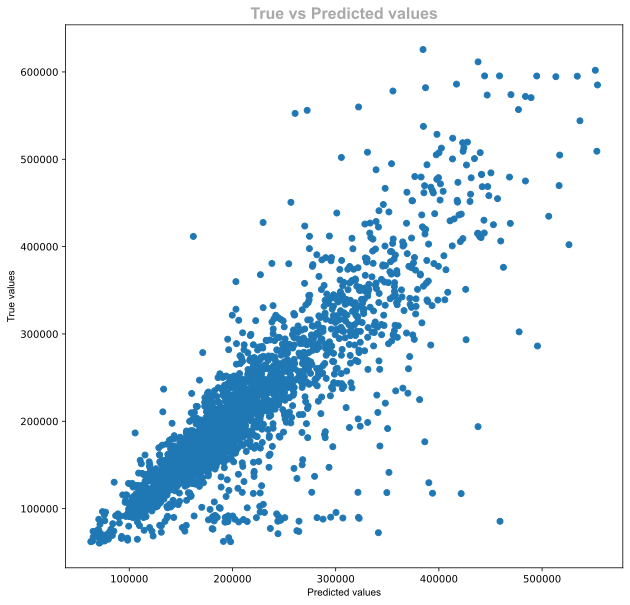

In [127]:
y_valid_preds = final_model.predict(X_valid)
r2_score(y_valid, y_valid_preds)

##### Важность признаков

In [128]:
feature_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
3,Square,0.420337
10,Social_1,0.105287
11,Social_2,0.081074
12,Social_3,0.067091
2,Rooms,0.064041
1,DistrictId,0.051156
9,Ecology_1,0.041425
8,HouseYear,0.033711
13,Healthcare_1,0.025436
5,KitchenSquare,0.020247


### Сохранение модели

In [131]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

In [133]:
with open(MODEL_PATH, 'wb') as file:
    pickle.dump(final_model, file)